In [1]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes

diabets = load_diabetes()
df_X = diabets['data']
df_y = diabets['target']

print(df_X.shape, df_y.shape)

(442, 10) (442,)


In [2]:
# feature, target 데이터 준비
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

print(X.shape, y.shape)
print(type(X), type(y))

(442, 10) (442,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
# train 데이터와 test 데이터로 분리하기
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=980417)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [24]:
# LinearRegressor 밑바닥부터 구현

# Weight, Bias 초기화화
fearture_n = X.shape[1]
print(f'{fearture_n=}')

W = np.ones(shape=(fearture_n, ))
b = 0

# 모델_forward
def model_forward(X):
    y_pred = np.sum(X * W.T, axis=1) + b
    return y_pred

model_forward(X_test)

fearture_n=10


array([ 0.31369271,  0.136227  ,  0.20755694, -0.05574581,  0.12213048,
        0.16053855, -0.13675989, -0.34115955,  0.3048683 , -0.01354474,
        0.14443881, -0.08081675, -0.1046118 ,  0.1173764 ,  0.23240431,
        0.19145365, -0.34670857,  0.25365353,  0.03415023,  0.14690887,
        0.14561109,  0.17457721, -0.49774087, -0.00532923, -0.07323506,
        0.13677629,  0.27302971, -0.44087274,  0.33067064, -0.0497337 ,
        0.16488269,  0.3493321 , -0.40385245, -0.17230902, -0.33604013,
        0.19650588, -0.15599486, -0.47237452, -0.51496675, -0.28416118,
       -0.10428125,  0.38684948,  0.03015376, -0.04402088,  0.33014298,
        0.04954861, -0.11447257,  0.19929515, -0.26283791, -0.31814748,
        0.2097097 , -0.2267392 , -0.49948537, -0.03944107, -0.23007767,
        0.00176495, -0.05732353,  0.08218236,  0.11961625,  0.29874097,
       -0.29285848, -0.16543086, -0.50030931, -0.04873298,  0.39686265,
       -0.04393841,  0.46349286, -0.21370652,  0.21852554,  0.19

In [25]:
# 손실함수 loss 정의하기 - MSE
def mse_loss(X, y):
    y_pred = model_forward(X)
    mse = np.mean((y_pred - y)**2)

    return mse

mse_loss(X_test, y_test)

24429.247454052216

In [26]:
# 기울기 구하는 함수 구현하기
def gradient(X, y):
    y_pred = model_forward(X)
    W_grad = 2*X.T.dot(y_pred - y) / len(y) # mse식에서 W에 대한 편미분 = 2/n * sum(W dot X + b - y_true) * X = 2/n * sum(y_pred - y_true) * X
    b_grad = np.mean(2*(y_pred-y))

    return W_grad, b_grad

gradient(X_test, y_test)

(array([-2.52440971,  0.43658055, -0.09532442, -0.64975677, -3.37891198,
        -3.22777777, -0.12395944, -1.71581098, -1.97456849, -1.51430246]),
 -277.4376610338638)

In [27]:
# np.dot 이해
A = np.array([
    [1, 2],
    [3, 4]
])

c = [5, 6]

print(A * c)
print(A.dot(c))

[[ 5 12]
 [15 24]]
[17 39]


In [28]:
# 하이퍼 파라미터인 학습률 설정하기

lr = 0.05

In [29]:
# 모델 학습하기

loss_history = list()
weight_history =  list()
bias_history = list()

epochs = 100000

for epoch in range(epochs):
    W_grad, b_grad = gradient(X_train, y_train)

    W = W - lr*W_grad
    b = b - lr*b_grad

    loss = mse_loss(X_train, y_train)

    loss_history.append(loss)
    weight_history.append(W)
    bias_history.append(b)

    if ((epoch+1) % 10000) == 0:
        print(f'epoch ({epoch+1}) ===> loss : {loss}')

epoch (10000) ===> loss : 2961.207630347364
epoch (20000) ===> loss : 2945.2334527566786
epoch (30000) ===> loss : 2943.7057024145397
epoch (40000) ===> loss : 2942.7383413378843
epoch (50000) ===> loss : 2941.8548942260204
epoch (60000) ===> loss : 2941.0165326340434
epoch (70000) ===> loss : 2940.216083229839
epoch (80000) ===> loss : 2939.449975824336
epoch (90000) ===> loss : 2938.7155584674974
epoch (100000) ===> loss : 2938.0106895299955


In [30]:
# test 데이터에 대한 성능 확인하기

mse_loss(X_test, y_test)

2670.6729207143203

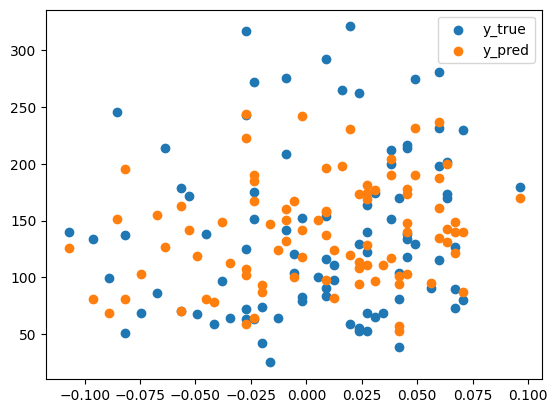

In [31]:
# 정답 데이터와 예측한 데이터 시각화하기
import matplotlib.pyplot as plt

y_pred = model_forward(X_test)

plt.scatter(x=X_test[:, 0], y=y_test, label='y_true')
plt.scatter(x=X_test[:, 0], y=y_pred, label='y_pred')

plt.legend()
plt.show()

In [32]:
# 기타 확인하고 싶은 사항

In [47]:
# feature 데이터의 정규화 확인하기
# 정규화 조건 : 평균으로 빼고, 표준편차*(샘플 개수**0.5)으로 나눔
# 따라서 각 샘플에 샘플 개수**0.5을 곱해주면, 표준정규화된 데이터가 나올 것임.
n = X.shape[0]
X_standardization = X * np.sqrt(n)
print(X_standardization.mean(axis=0))
print(X_standardization.var(axis=0))
print(X_standardization.std(axis=0))

[-4.52127024e-17  2.42641503e-16 -4.70563759e-15 -9.42433663e-16
 -2.78309301e-16  8.60799617e-16 -1.06501032e-16 -2.97399109e-16
  1.94354965e-15  2.88136784e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [55]:
# s4 tch, total cholesterol / HDL 데이터는 혈청 콜레스테롤/고밀도 지질단백 이다.
# 이미 기존에 있는 컬럼으로 계산된 값인지 확인이 필요하다.
my_cal = X_standardization[:, 4] / X_standardization[:, 6]
s4 = X_standardization[:, 7]

(my_cal - s4).sum()

191.61695441762615

In [56]:
# 값 차이가 많이 난다. 따라서 해당 변수를 섣불리 지우는 것은 바람직 하지 않다.
# 원인은 다음 중 하나일 것이다.
    # 1. 위 가정이 잘못되었을 가능성(s4변수는 단순 계산값이 아님)
    # 2. 정규화 하는 과정에서 매우 낮은 값으로 인해 계산 오차 발생